In [1]:
import requests


site = "https://query1.finance.yahoo.com/v8/finance/chart/2330.TW?period1=0&period2=1549258857&interval=1mo&events=history&=hP2rOschxO0"
response = requests.get(site,headers={'User-agent': 'Mozilla/5.0'})
response.text[:1000]

'{"chart":{"result":[{"meta":{"currency":"TWD","symbol":"2330.TW","exchangeName":"TAI","instrumentType":"EQUITY","firstTradeDate":946947600,"regularMarketTime":1648091921,"gmtoffset":28800,"timezone":"CST","exchangeTimezoneName":"Asia/Taipei","regularMarketPrice":590.0,"chartPreviousClose":69.649,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"CST","start":1648083600,"end":1648083600,"gmtoffset":28800},"regular":{"timezone":"CST","start":1648083600,"end":1648099800,"gmtoffset":28800},"post":{"timezone":"CST","start":1648099800,"end":1648099800,"gmtoffset":28800}},"dataGranularity":"1mo","range":"","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[949334400,951840000,954518400,957110400,959788800,962380800,965059200,967737600,970329600,973008000,975600000,978278400,980956800,983376000,986054400,988646400,991324800,993916800,996595200,999273600,1001865600,1004544000,1007136000,1009814400,1012492800,1014912000,1017590400,1020182400,1022860

In [2]:
import json
import numpy as np
import pandas as pd

In [3]:
data = json.loads(response.text)

In [4]:
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=data['chart']['result'][0]['timestamp'])
df.head()

,low,volume,high,close,open
949334400,74.344429,2105051075869,86.865616,78.648293,80.213676
951840000,67.301331,3729081599300,83.735229,80.213676,80.213676
954518400,68.475182,2886047091778,83.344070,77.083290,80.213676
957110400,69.257500,2198883235267,81.638123,78.632591,77.083290
959788800,70.368690,1362578196849,81.136963,73.123642,78.131905


In [5]:
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
df.head()

,low,volume,high,close,open
2000-01-31 16:00:00,74.344429,2105051075869,86.865616,78.648293,80.213676
2000-02-29 16:00:00,67.301331,3729081599300,83.735229,80.213676,80.213676
2000-03-31 16:00:00,68.475182,2886047091778,83.344070,77.083290,80.213676
2000-04-30 16:00:00,69.257500,2198883235267,81.638123,78.632591,77.083290
2000-05-31 16:00:00,70.368690,1362578196849,81.136963,73.123642,78.131905


<AxesSubplot:>

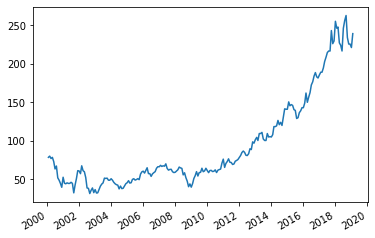

In [6]:
df.close.plot()